# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/mwidas/220-assignment-3-mwidas

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


Spilling Incidents: This dataset contains records of spills of petroleum and other hazardous materials. Under State law and regulations, spills that could pollute the lands or waters of the state must be reported by the spiller (and, in some cases, by anyone who has knowledge of the spill). Examples of what may be included in a spill record includes: Administrative information (DEC region and unique seven-digit spill number). Program facility name. Spill date/time. Location. Spill source and cause. Material(s) and material type spilled. Quantity spilled and recovered. Units measured. Surface water bodies affected. Close date (cleanup activity finished and all paperwork completed).

New York State Department of Environmental Conservation. “Spill Incidents.” Accessed November 5, 2023. https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk.


TIGER: The TIGER/Line Shapefiles are extracts of selected geographic and cartographic information from the
Census Bureau's Master Address File (MAF)/Topologically Integrated Geographic Encoding and
Referencing (TIGER) System (MTS). 

U.S. Census Bureau. “2022 TIGER/Line Shapefiles: Counties (and Equivalent).” Accessed November 5, 2023. https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=Counties+%28and+equivalent%29.


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

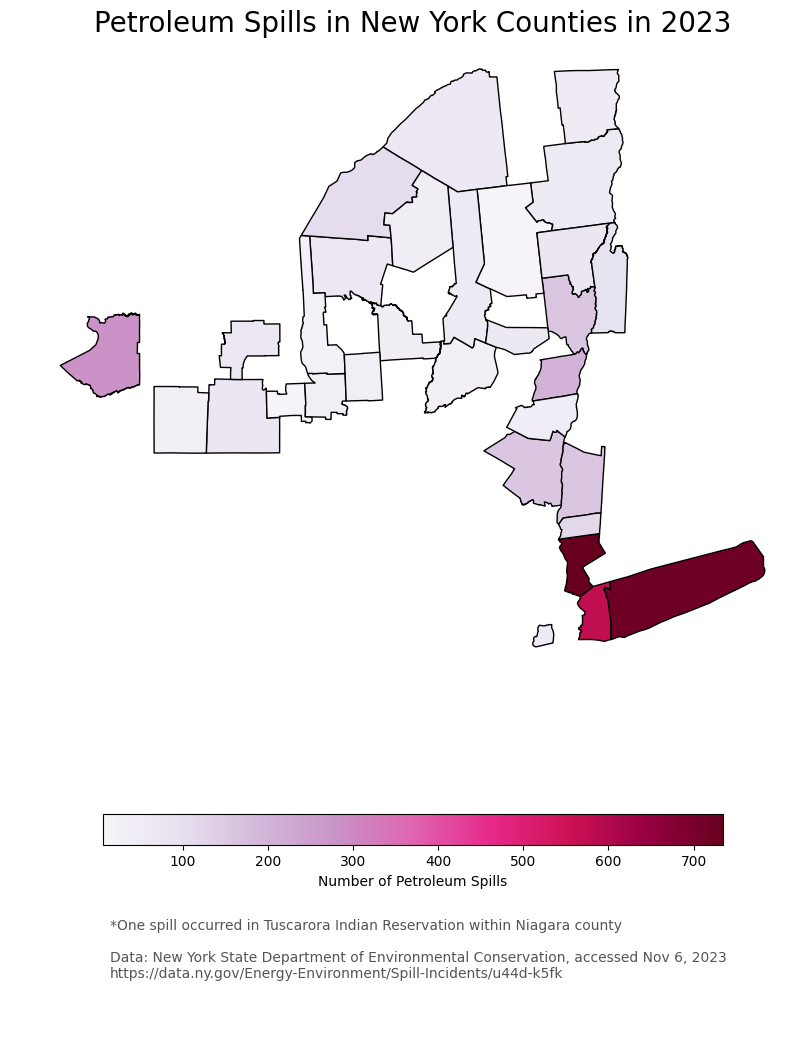

In [4]:
### ===== FINAL CODE =====
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# import numpy too
import numpy as np

# import NY spills data
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')

# import US counties shapefile
counties = gpd.read_file('data/tl_2022_us_county')

# Spills Exploration
# 1. check the head of the spills data frame
spills.head()

# 2. simplify column names

# make all column names lower
spills.columns = spills.columns.str.lower()

# checked first row to see output
spills.head(1)

# make all names 1 word
spills.columns = spills.columns.str.replace(' ', '_')

# 3. check the data types of the columns
spills.dtypes

# 4. check unique values in the material_family column
spills.material_family.unique()

# 5. check unique values in the county column
spills.county.unique()

# Spills Data Selection
# 1. subset spills data

# make sure date is stored as a datetime object and not as a string
spills.spill_date = pd.to_datetime(spills.spill_date)

# Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023
petr_23 = spills[(spills.material_family=="Petroleum")&(spills.spill_date>="01/01/2023")&(spills.spill_date<="10/31/2023")]

# 2. use unique to verify there is only Petroleum for material family
petr_23.material_family.unique()

# 3. use unique to verify there is only data for 2022 for spill_date
petr_23.spill_date.dt.year.unique()

# 4. use unique to verify there is only data for January to October for spill_date
petr_23.spill_date.dt.month.unique()

# new dataframe with petroleum spills per county from January to October
spills_per_county = petr_23.groupby(['county']).size().reset_index(name='n_spills')

# Prepare Counties Data
# 1. Check the geo-dataframe's head
counties.head()

# 2. simplify column names as needed
counties.columns = counties.columns.str.lower()

# 3. Check the data types of the counties columns
counties.dtypes

# 4. Check the geo-dataframes crs
counties.crs

# 5. plot the geo-dataframe
# counties.plot()

# Counties data selection
# select all the counties for the state of NY
ny_counties = counties[counties.statefp == '36']

# plot new data subset to ensure only NY is shown
# ny_counties.plot()

# 1. Print the names of counties in `ny_counties`, without repetition.
ny_counties.name.unique()

# 2. Print the names of counties in `spills_per_county`, without repetition.
spills_per_county.county.unique()

# 3. find the county names that are in `spills_per_county`, but not in `ny_counties`
np.setdiff1d(spills_per_county.county.unique(), ny_counties.name.unique())

# 4. Find the county names that are in `ny_counties`, but not in `spills_per_county`
np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique())

# 5. Check the number of spills in 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation']

# Data Updates in ny_counties
# 1. find row that has St Lawrence
spills_per_county[spills_per_county.county == 'St Lawrence']

# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]

# 4. update St Lawrence name in `spills_per_county` dataframe
spills_per_county.at[st_lawrence_index, 'county'] = "St. Lawrence"

# 5. Check the update was successfull
np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique())

#Merging
# 1. standardize the name of the counties between the datasets
ny_counties = ny_counties.rename(columns={'name':'county'})

# 2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes
ny_counties = pd.merge(ny_counties,
        spills_per_county,
        how='inner',
        on='county')

# 3. update spill from Tuscarora to Niagara County
ny_counties = ny_counties.set_index('county')

# add one spill to Niagara County
ny_counties.at['Niagara', 'n_spills'] += 1

# check to see that Niagara increased their spills by 1 county
# print(ny_counties.at['Niagara', 'n_spills'])

# create a final map
# initialize figure and set size
fig, ax = plt.subplots(figsize=(10, 12))

# turn axis off
ax.axis('off')

# plot these graphs
ny_counties.plot(ax=ax,
                      column='n_spills',
                       cmap='PuRd', #change map color to scale of purple to red 
                       legend=True,
                       edgecolor='black',
                       legend_kwds={'shrink':.8,
                                    'label': 'Number of Petroleum Spills', 
                                    'orientation': 'horizontal'
                                    }
                       )

# set titles 
ax.set_title('Petroleum Spills in New York Counties in 2023',  fontsize=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 6, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.11, .05), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')
# annotate that we added a spill to Niagara County
ax.annotate("*One spill occurred in Tuscarora Indian Reservation within Niagara county", 
            xy=(0.11, .09), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')
plt.show()

<!-- write your description in this markdwon cell -->

## Import libraries

In [5]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# import numpy too
import numpy as np


## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [6]:
# import NY spills data
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')
# import US counties shapefile
counties = gpd.read_file('data/tl_2022_us_county')


## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [7]:
# 1. check the head of the spills data frame
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [8]:
# 2. simplify column names

# make all column names lower
spills.columns = spills.columns.str.lower()

# checked first row to see output
spills.head(1)

# make all names 1 word
spills.columns = spills.columns.str.replace(' ', '_')

#check first row to see output
spills.head(1)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0


In [9]:
# 3. check the data types of the columns
spills.dtypes

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [10]:
# 4. check unique values in the material_family column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [11]:
# 5. check unique values in the county column
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [12]:
# 1. 
# make sure date is stored as a datetime object and not as a string
spills.spill_date = pd.to_datetime(spills.spill_date)

# Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023
petr_23 = spills[(spills.material_family=="Petroleum")&(spills.spill_date>="01/01/2023")&(spills.spill_date<="10/31/2023")]

# look at head of petr_2023
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [13]:
# 2. use unique to verify there is only Petroleum for material family
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [14]:
# 3. use unique to verify there is only data for 2022 for spill_date
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [15]:
#4. use unique to verify there is only data for January to October for spill_date
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [16]:
# new dataframe with petroleum spills per county from January to October
spills_per_county = petr_23.groupby(['county']).size().reset_index(name='n_spills')

# check new data frame for output
spills_per_county.head()

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [17]:
# 1. Check the geo-dataframe's head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [18]:
# 2. simplify column names as needed
counties.columns = counties.columns.str.lower()

# check the head of counties data
counties.head()

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [19]:
# 3. Check the data types of the counties columns
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp        float64
cbsafp       float64
metdivfp     float64
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [20]:
# 4. Check the geo-dataframes crs
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

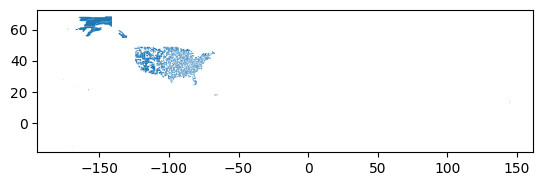

In [21]:
# 5. plot the geo-dataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

<AxesSubplot:>

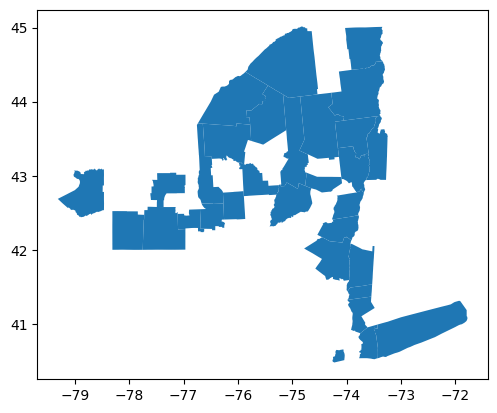

In [22]:
# select all the counties for the state of NY
ny_counties = counties[counties.statefp == '36']

ny_counties.plot()

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [23]:
# 1. Print the names of counties in `ny_counties`, without repetition.
ny_counties.name.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [24]:
# 2. Print the names of counties in `spills_per_county`, without repetition.
spills_per_county.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [25]:
# 3. find the county names that are in `spills_per_county`, but not in `ny_counties`
np.setdiff1d(spills_per_county.county.unique(), ny_counties.name.unique())

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [26]:
# 4. Find the county names that are in `ny_counties`, but not in `spills_per_county`
np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique())

array(['St. Lawrence'], dtype=object)

In [27]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [28]:
# 1. find row that has St Lawrence
spills_per_county[spills_per_county.county == 'St Lawrence']

,county,n_spills
50,St Lawrence,65


In [29]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [30]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
# show me the index
st_lawrence_index

50

In [31]:
# 4. update St Lawrence name in `spills_per_county` dataframe
spills_per_county.at[st_lawrence_index, 'county'] = "St. Lawrence"

In [32]:
# 5. Check the update was successfull
np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique())

array([], dtype=object)

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [33]:
# 1. standardize the name of the counties
ny_counties = ny_counties.rename(columns={'name':'county'})

In [34]:
# 2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes
ny_counties = pd.merge(ny_counties,
        spills_per_county,
        how='inner',
        on='county')

ny_counties.head()

,statefp,countyfp,countyns,geoid,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,NaN,NaN,NaN,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,NaN,NaN,NaN,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",159
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,NaN,NaN,NaN,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,NaN,NaN,NaN,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,NaN,NaN,NaN,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",159


In [35]:
# 3. update spill from Tuscarora
ny_counties = ny_counties.set_index('county')
ny_counties.head()

,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
county,,,,,,,,,,,,,,,,,,
Steuben,36,101,00974148,36101,Steuben County,06,H1,G4020,NaN,NaN,NaN,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
Saratoga,36,091,00974143,36091,Saratoga County,06,H1,G4020,NaN,NaN,NaN,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",159
Allegany,36,003,00974100,36003,Allegany County,06,H1,G4020,NaN,NaN,NaN,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
Oswego,36,075,00974136,36075,Oswego County,06,H1,G4020,NaN,NaN,NaN,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
Ulster,36,111,00974153,36111,Ulster County,06,H1,G4020,NaN,NaN,NaN,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",159


In [36]:
# add one spill to Niagara County
ny_counties.at['Niagara', 'n_spills'] += 1

# check to see that Niagara increased their spills by 1 county
print(ny_counties.at['Niagara', 'n_spills'])

89


## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

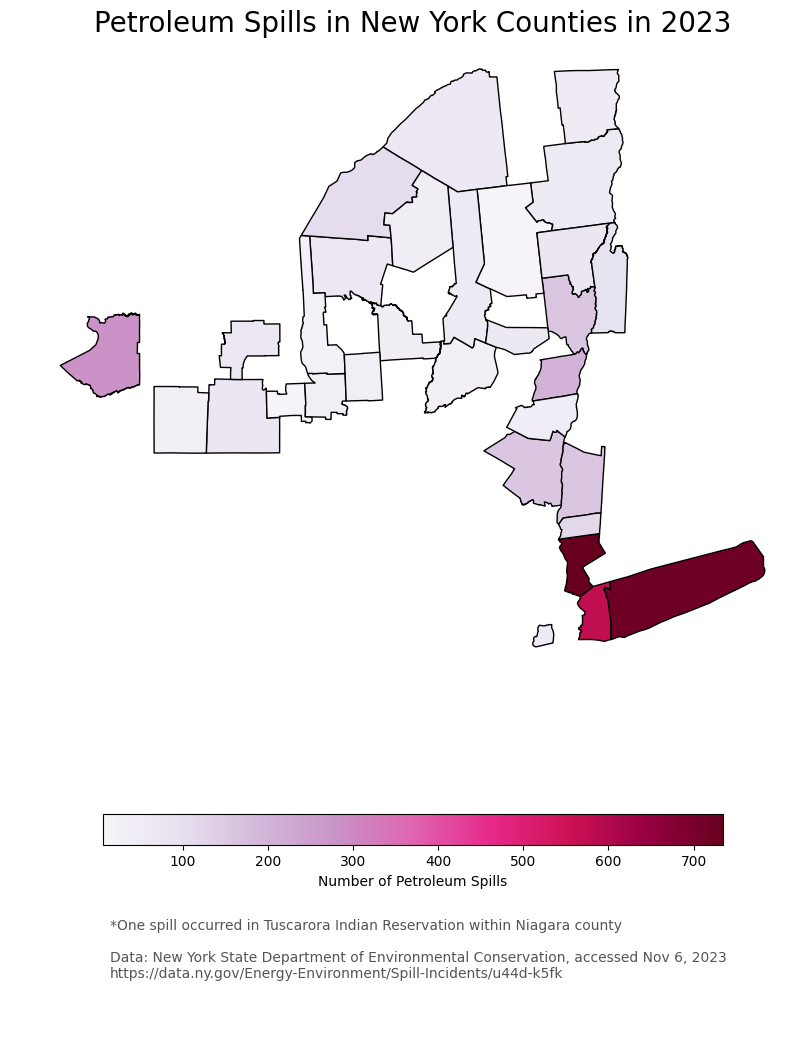

In [37]:
# create a final map
# initialize figure and set size
fig, ax = plt.subplots(figsize=(10, 12))

# turn axis off
ax.axis('off')

# plot these graphs
ny_counties.plot(ax=ax,
                      column='n_spills',
                       cmap='PuRd', #change map color to scale of purple to red 
                       legend=True,
                       edgecolor='black',
                       legend_kwds={'shrink':.8,
                                    'label': 'Number of Petroleum Spills', 
                                    'orientation': 'horizontal'
                                    }
                       )

# set titles 
ax.set_title('Petroleum Spills in New York Counties in 2023',  fontsize=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 6, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.11, .05), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')
# annotate that we added a spill to Niagara County
ax.annotate("*One spill occurred in Tuscarora Indian Reservation within Niagara county", 
            xy=(0.11, .09), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')
plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.